In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('C:/Users/monte/OneDrive/Documentos/codigos/projeto-house-price-prediction/house-price-prediction/data/processed/housing_final.csv')

In [4]:
# 1. Análise Exploratória Inicial
print("="*50)
print("Dimensões do Dataset:")
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}\n")

print("="*50)
print("Tipos de Dados e Valores Faltantes:")
print(df.info())

Dimensões do Dataset:
Linhas: 20433, Colunas: 20

Tipos de Dados e Valores Faltantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bedrooms_per_household      20433 non-null  float64
 1   bedrooms_per_room           20433 non-null  float64
 2   households                  20433 non-null  float64
 3   housing_median_age          20433 non-null  float64
 4   median_house_value          20433 non-null  float64
 5   median_income               20433 non-null  float64
 6   median_income_squared       20433 non-null  float64
 7   ocean_proximity_<1H OCEAN   20433 non-null  int64  
 8   ocean_proximity_INLAND      20433 non-null  int64  
 9   ocean_proximity_ISLAND      20433 non-null  int64  
 10  ocean_proximity_NEAR BAY    20433 non-null  int64  
 11  ocean_proximity_NEAR OCEAN  20433 non-null  int64  
 12  po

In [5]:
# 2. Estatísticas Descritivas
print("\n" + "="*50)
print("Estatísticas Descritivas das Variáveis Numéricas:")
print(df.describe().T.drop('count', axis=1).round(2))


Estatísticas Descritivas das Variáveis Numéricas:
                                 mean        std       min        25%  \
bedrooms_per_household           1.10       0.48      0.33       1.01   
bedrooms_per_room                0.21       0.06      0.10       0.18   
households                     499.43     382.30      1.00     280.00   
housing_median_age              28.63      12.59      1.00      18.00   
median_house_value          206864.41  115435.67  14999.00  119500.00   
median_income                    3.87       1.90      0.50       2.56   
median_income_squared           18.59      21.93      0.25       6.57   
ocean_proximity_<1H OCEAN        0.44       0.50      0.00       0.00   
ocean_proximity_INLAND           0.32       0.47      0.00       0.00   
ocean_proximity_ISLAND           0.00       0.02      0.00       0.00   
ocean_proximity_NEAR BAY         0.11       0.31      0.00       0.00   
ocean_proximity_NEAR OCEAN       0.13       0.33      0.00       0.00   


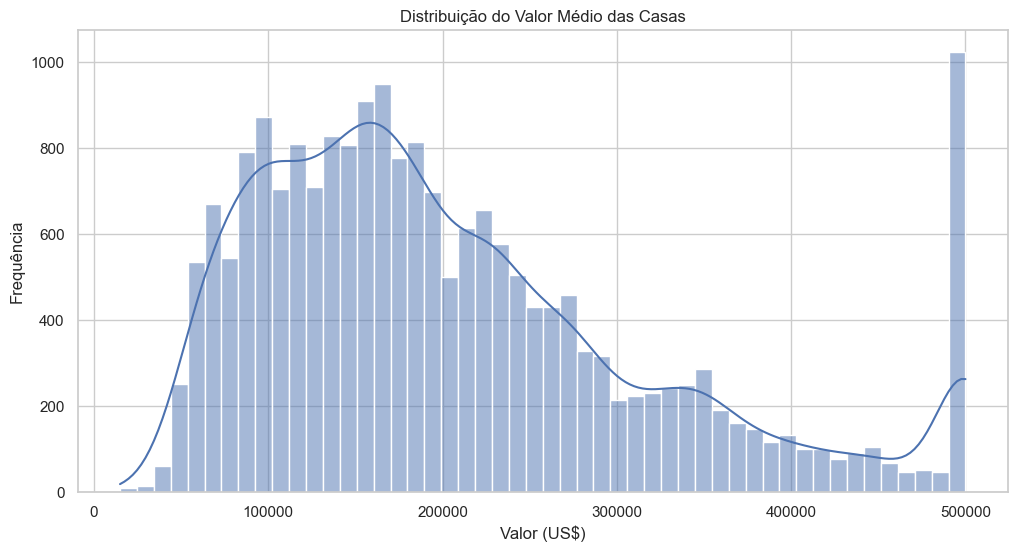

In [6]:
# 3. Análise da median_house_value
plt.figure(figsize=(12, 6))
sns.histplot(df['median_house_value'], kde=True, bins=50)
plt.title('Distribuição do Valor Médio das Casas')
plt.xlabel('Valor (US$)')
plt.ylabel('Frequência')
plt.show()

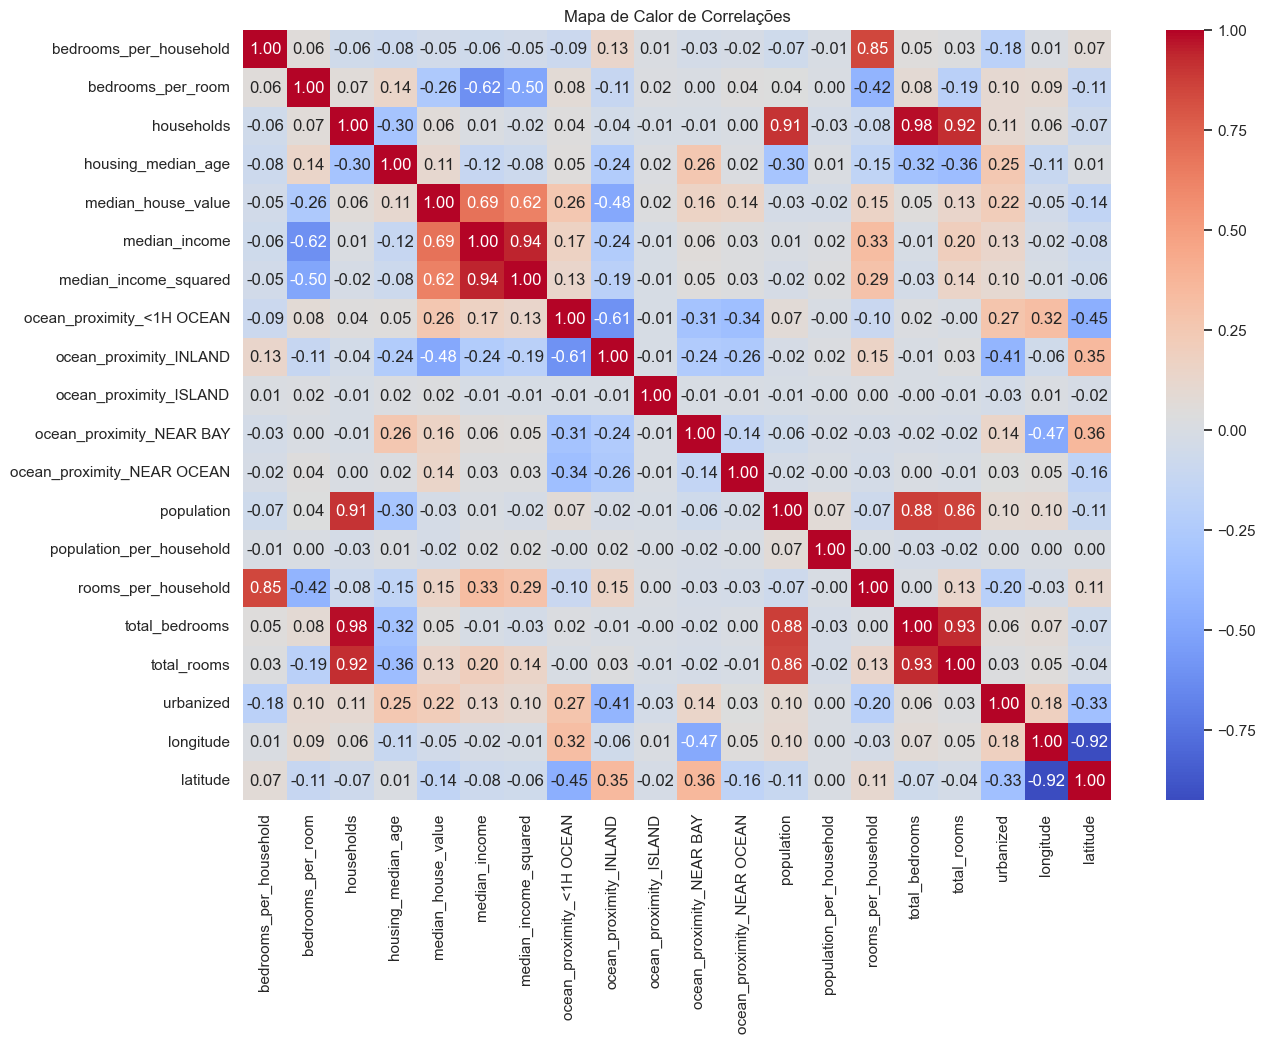

In [7]:
# 4. Correlações entre Variáveis
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlações')
plt.show()

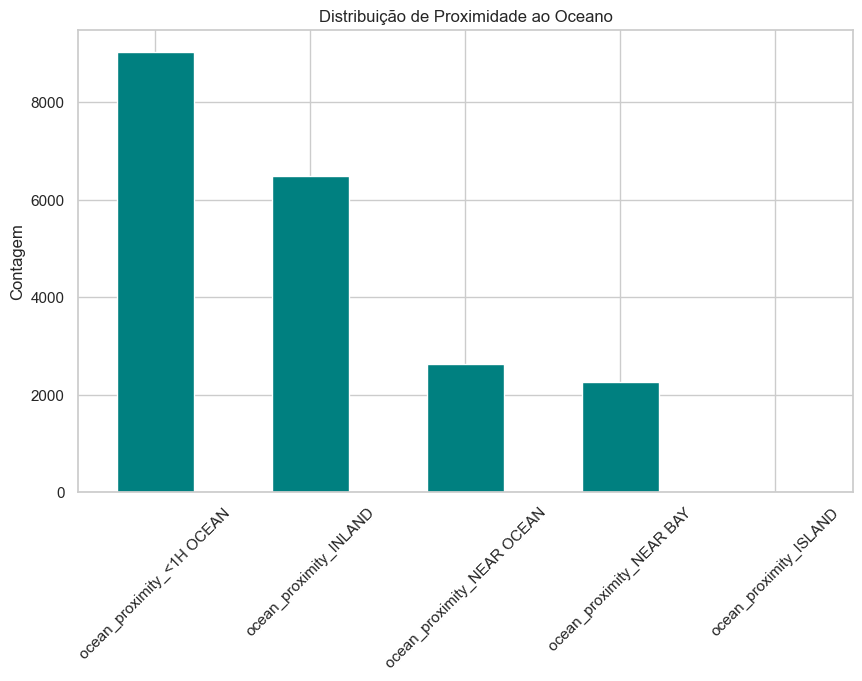

In [8]:
# 5. Análise de Proximidade do Oceano
ocean_values = df.filter(like='ocean_proximity').sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ocean_values.plot(kind='bar', color='teal')
plt.title('Distribuição de Proximidade ao Oceano')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

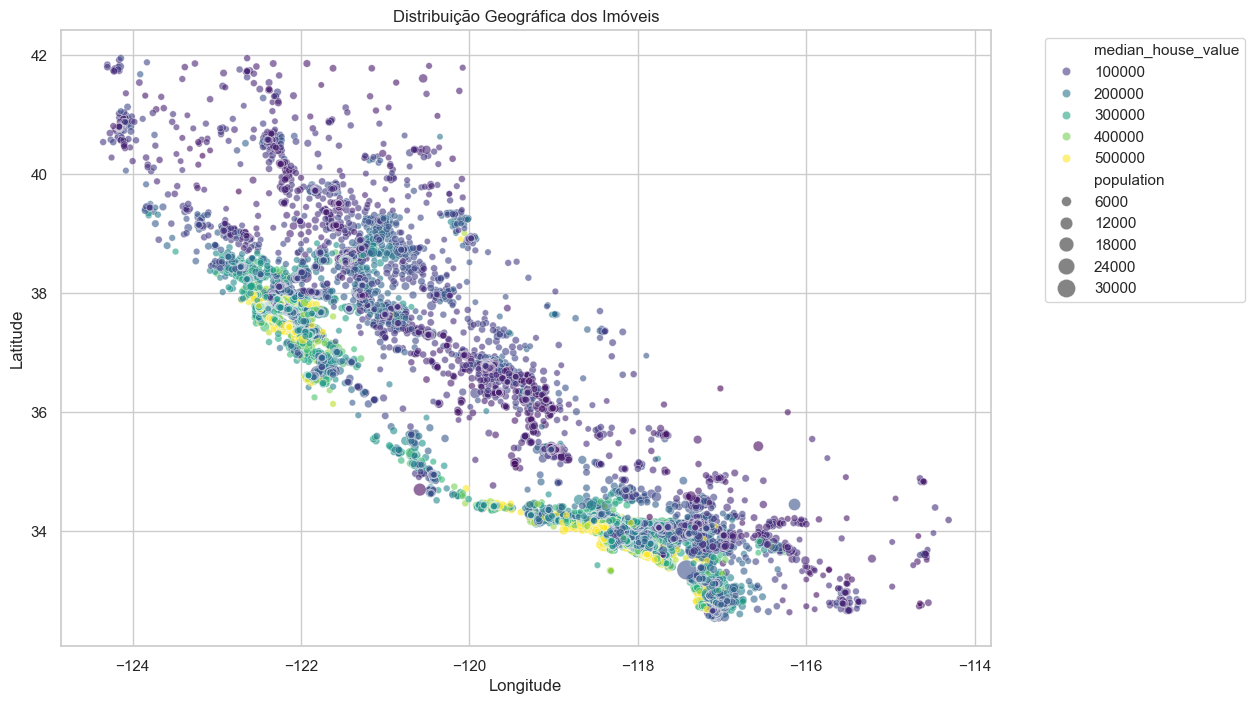

In [9]:
# 6. Distribuição Geográfica
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=df,
                hue='median_house_value', palette='viridis',
                size='population', sizes=(20, 200), alpha=0.6)
plt.title('Distribuição Geográfica dos Imóveis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

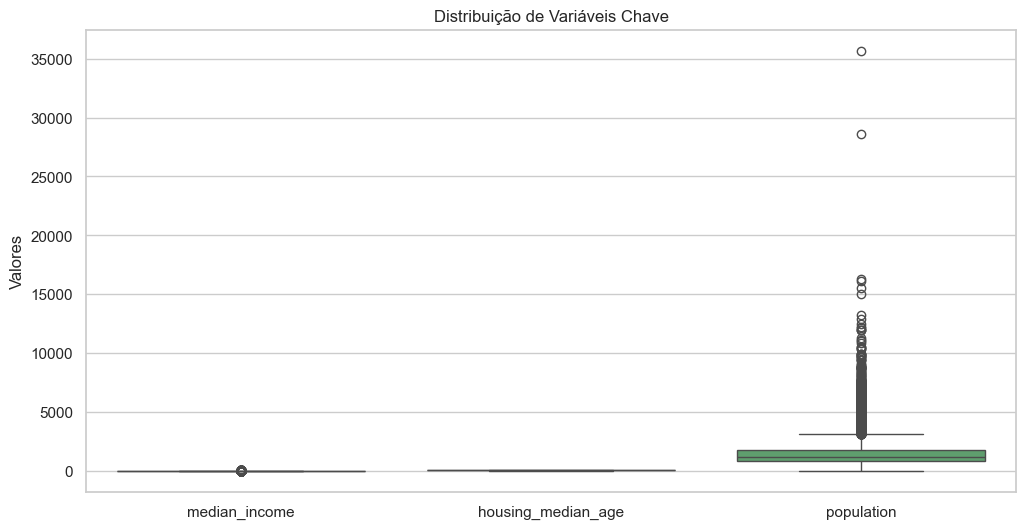

In [10]:
# 7. Análise de Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['median_income', 'housing_median_age', 'population']])
plt.title('Distribuição de Variáveis Chave')
plt.ylabel('Valores')
plt.show()

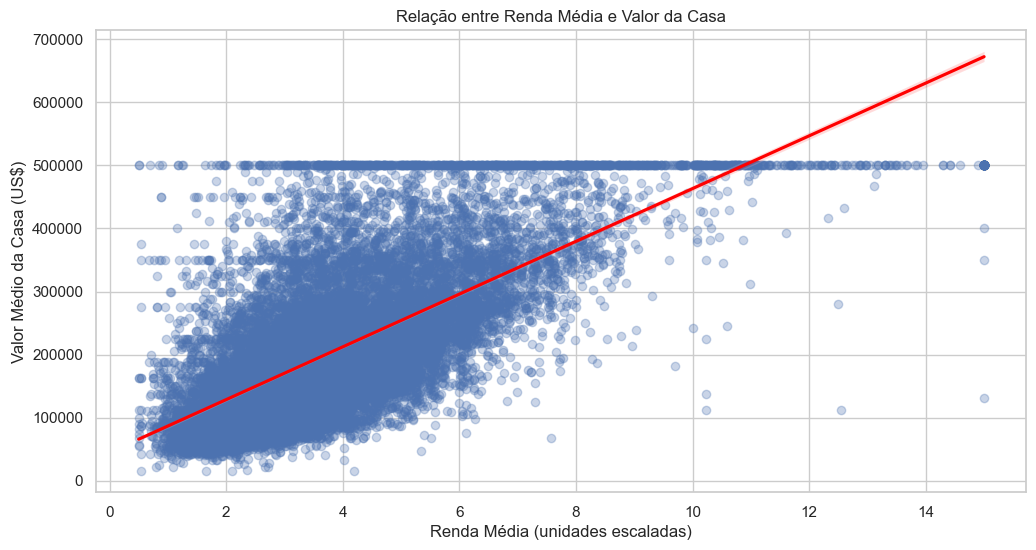

In [11]:
# 8. Relação entre Renda e Valor da Casa
plt.figure(figsize=(12, 6))
sns.regplot(x='median_income', y='median_house_value', data=df,
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relação entre Renda Média e Valor da Casa')
plt.xlabel('Renda Média (unidades escaladas)')
plt.ylabel('Valor Médio da Casa (US$)')
plt.show()

In [18]:
# 9. Verificaçao de dados truncados em 500001
for col in df.columns:
    count_trunc = (df[col] == 500001).sum()
    if count_trunc > 0:
        print(f"A coluna '{col}' possui {count_trunc} ocorrências do valor 500001")
        #proporção de dados truncados
        print(f"{100 * count_trunc / len(df):.2f}% dos dados estão truncados.")


A coluna 'median_house_value' possui 958 ocorrências do valor 500001
4.69% dos dados estão truncados.
